# Election data

In [61]:
%load_ext autoreload
%load_ext lab_black
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from algorithms import *

In [40]:
mun_elec_df = pd.read_csv(
    "../Datasets/Bolivia/elecc_gen_mun_2019.csv", encoding="latin-1"
)
data_df = pd.read_csv("../Datasets/Bolivia/data_2019.csv", encoding="latin-1")

In [41]:
# mun_elec_df = pd.read_excel(
#     "/Users/adrianvillarroel/Documents/Docs_Adrian/BambooTec/election_data/Datasets/Bolivia/eleccion-hourly-oficial/acta.2019.10.25.07.20.35.xlsx"
# )

In [42]:
mun_elec_df.head()

YEAR  CODIGO_MUNICIPIO NOMBRE_DEPARTAMENTO NOMBRE_PROVINCIA  \
0  1985             90501               PANDO   FEDERICO ROMAN   
1  1985             90503               PANDO   FEDERICO ROMAN   
2  1985             90402               PANDO            ABUNA   
3  1985             90401               PANDO            ABUNA   
4  1985             90104               PANDO   NICOLAS SUAREZ   

  NOMBRE_MUNICIPIO  VALIDOS  BLANCOS  NULOS  INSCRITOS  TOTAL  
0  NUEVA ESPERANZA       18        0      0         22     18  
1   SANTOS MERCADO      123       19      4        169    146  
2           INGAVI      774       22     95        981    891  
3       SANTA ROSA      187        1      1        203    189  
4       BELLA FLOR      853       27     11        968    891

In [43]:
data_df.head()

PAIS  NÚMERO_DEPARTAMENTO NOMBRE_DEPARTAMENTO NOMBRE_PROVINCIA  \
0  BOLIVIA                    1          CHUQUISACA          OROPEZA   
1  BOLIVIA                    1          CHUQUISACA          OROPEZA   
2  BOLIVIA                    1          CHUQUISACA          OROPEZA   
3  BOLIVIA                    1          CHUQUISACA          OROPEZA   
4  BOLIVIA                    1          CHUQUISACA          OROPEZA   

   NÚMERO_MUNICIPIO NOMBRE_MUNICIPIO  CIRCUNSCRIPCIÓN      LOCALIDAD  \
0                 1            SUCRE              NaN        ARABATE   
1                 1            SUCRE              NaN       CHAUNACA   
2                 1            SUCRE              NaN       CHAUNACA   
3                 1            SUCRE              NaN  CHUQUI CHUQUI   
4                 1            SUCRE              NaN  CHUQUI CHUQUI   

                          RECINTO  NUMERO_MESA  ...  21F PDC  MNR  PAN-BOL  \
0                 ESCUELA ARABATE        10001  ...    1   0    0        0   
1   ESCUELA SECCIONAL DE CHAUNACA        10002  ...    3  11    1        1   
2   ESCUELA SECCIONAL DE CHAUNACA        10003  ...    1   4    0        0   
3  UNIDAD EDUCATIVA CHUQUI CHUQUI        10004  ...    3  11    2        0   
4  UNIDAD EDUCATIVA CHUQUI CHUQUI        10005  ...    6  15    0        0   

   VALIDOS  BLANCOS  NULOS  ESTADO_ACTA  YEAR  CODIGO_MUNICIPIO  
0       82        6     11    COMPUTADA  2019             10101  
1      171        6     12    COMPUTADA  2019             10101  
2       78        5      0    COMPUTADA  2019             10101  
3      168       11     13    COMPUTADA  2019             10101  
4      172       13      5    COMPUTADA  2019             10101  

[5 rows x 28 columns]

In [44]:
data_df.shape

(33044, 28)

In [45]:
data_df.columns

Index(['PAIS', 'NÚMERO_DEPARTAMENTO', 'NOMBRE_DEPARTAMENTO',
       'NOMBRE_PROVINCIA', 'NÚMERO_MUNICIPIO', 'NOMBRE_MUNICIPIO',
       'CIRCUNSCRIPCIÓN', 'LOCALIDAD', 'RECINTO', 'NUMERO_MESA', 'CÓDIGO_MESA',
       'ELECCIÓN', 'INSCRITOS', 'CC', 'FPV', 'MTS', 'UCS', 'MAS', '21F', 'PDC',
       'MNR', 'PAN-BOL', 'VALIDOS', 'BLANCOS', 'NULOS', 'ESTADO_ACTA', 'YEAR',
       'CODIGO_MUNICIPIO'],
      dtype='object')

## Calculating turnout and percentage of votes for winner

In [8]:
data_df["turnout_percentage"] = (
    data_df["VALIDOS"] * 100 / data_df["INSCRITOS"]
).round()

In [9]:
data_df["winner_percentage"] = (data_df["MAS"] * 100 / data_df["INSCRITOS"]).round()

In [10]:
data_df.head()

PAIS  NÚMERO_DEPARTAMENTO NOMBRE_DEPARTAMENTO NOMBRE_PROVINCIA  \
0  BOLIVIA                    1          CHUQUISACA          OROPEZA   
1  BOLIVIA                    1          CHUQUISACA          OROPEZA   
2  BOLIVIA                    1          CHUQUISACA          OROPEZA   
3  BOLIVIA                    1          CHUQUISACA          OROPEZA   
4  BOLIVIA                    1          CHUQUISACA          OROPEZA   

   NÚMERO_MUNICIPIO NOMBRE_MUNICIPIO  CIRCUNSCRIPCIÓN      LOCALIDAD  \
0                 1            SUCRE              NaN        ARABATE   
1                 1            SUCRE              NaN       CHAUNACA   
2                 1            SUCRE              NaN       CHAUNACA   
3                 1            SUCRE              NaN  CHUQUI CHUQUI   
4                 1            SUCRE              NaN  CHUQUI CHUQUI   

                          RECINTO  NUMERO_MESA  ...  MNR PAN-BOL  VALIDOS  \
0                 ESCUELA ARABATE        10001  ...    0       0       82   
1   ESCUELA SECCIONAL DE CHAUNACA        10002  ...    1       1      171   
2   ESCUELA SECCIONAL DE CHAUNACA        10003  ...    0       0       78   
3  UNIDAD EDUCATIVA CHUQUI CHUQUI        10004  ...    2       0      168   
4  UNIDAD EDUCATIVA CHUQUI CHUQUI        10005  ...    0       0      172   

   BLANCOS  NULOS  ESTADO_ACTA  YEAR  CODIGO_MUNICIPIO  turnout_percentage  \
0        6     11    COMPUTADA  2019             10101                56.0   
1        6     12    COMPUTADA  2019             10101                78.0   
2        5      0    COMPUTADA  2019             10101                74.0   
3       11     13    COMPUTADA  2019             10101                76.0   
4       13      5    COMPUTADA  2019             10101                81.0   

   winner_percentage  
0               54.0  
1               62.0  
2               68.0  
3               53.0  
4               55.0  

[5 rows x 30 columns]

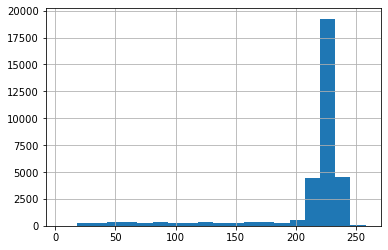

In [11]:
# Check distribution of registered
data_df["INSCRITOS"].hist(bins=20)
plt.show()

In [12]:
cut_threshold = data_df["INSCRITOS"].quantile(0.05)
print("Percentile 5: " + str(cut_threshold))

Percentile 5: 89.0


In [13]:
# Calculate the percentile of 100
percentile = stats.percentileofscore(data_df["INSCRITOS"], 100)
print("Percentile of 100 :" + str(percentile))

Percentile of 100 :5.834644716136061


In [14]:
# Filter out recints that have less than 100 registered people
outlier_rem_data_df = data_df[data_df["INSCRITOS"] >= 100]

In [30]:
outlier_rem_data_df

PAIS  NÚMERO_DEPARTAMENTO NOMBRE_DEPARTAMENTO NOMBRE_PROVINCIA  \
0      BOLIVIA                    1          CHUQUISACA          OROPEZA   
1      BOLIVIA                    1          CHUQUISACA          OROPEZA   
2      BOLIVIA                    1          CHUQUISACA          OROPEZA   
3      BOLIVIA                    1          CHUQUISACA          OROPEZA   
4      BOLIVIA                    1          CHUQUISACA          OROPEZA   
...        ...                  ...                 ...              ...   
33037  BOLIVIA                    9               PANDO   FEDERICO ROMAN   
33039  BOLIVIA                    9               PANDO   FEDERICO ROMAN   
33040  BOLIVIA                    9               PANDO   FEDERICO ROMAN   
33041  BOLIVIA                    9               PANDO   FEDERICO ROMAN   
33042  BOLIVIA                    9               PANDO   FEDERICO ROMAN   

       NÚMERO_MUNICIPIO NOMBRE_MUNICIPIO  CIRCUNSCRIPCIÓN  \
0                     1            SUCRE              NaN   
1                     1            SUCRE              NaN   
2                     1            SUCRE              NaN   
3                     1            SUCRE              NaN   
4                     1            SUCRE              NaN   
...                 ...              ...              ...   
33037                 3   SANTOS MERCADO              NaN   
33039                 3   SANTOS MERCADO              NaN   
33040                 3   SANTOS MERCADO              NaN   
33041                 3   SANTOS MERCADO              NaN   
33042                 3   SANTOS MERCADO              NaN   

                      LOCALIDAD                         RECINTO  NUMERO_MESA  \
0                       ARABATE                 ESCUELA ARABATE        10001   
1                      CHAUNACA   ESCUELA SECCIONAL DE CHAUNACA        10002   
2                      CHAUNACA   ESCUELA SECCIONAL DE CHAUNACA        10003   
3                 CHUQUI CHUQUI  UNIDAD EDUCATIVA CHUQUI CHUQUI        10004   
4                 CHUQUI CHUQUI  UNIDAD EDUCATIVA CHUQUI CHUQUI        10005   
...                         ...                             ...          ...   
33037                   RESERVA                   19 DE OCTUBRE        90383   
33039  SAN MARTIN DEL PACAHUARA               U.E.  23 DE MARZO        90385   
33040  SAN MARTIN DEL PACAHUARA               U.E.  23 DE MARZO        90386   
33041  SAN MARTIN DEL PACAHUARA               U.E.  23 DE MARZO        90387   
33042            VILLA VICTORIA           U.E. 11 DE SEPTIEMBRE        90388   

       ...  MNR PAN-BOL  VALIDOS  BLANCOS  NULOS  ESTADO_ACTA  YEAR  \
0      ...    0       0       82        6     11    COMPUTADA  2019   
1      ...    1       1      171        6     12    COMPUTADA  2019   
2      ...    0       0       78        5      0    COMPUTADA  2019   
3      ...    2       0      168       11     13    COMPUTADA  2019   
4      ...    0       0      172       13      5    COMPUTADA  2019   
...    ...  ...     ...      ...      ...    ...          ...   ...   
33037  ...    2       1      181        4      6    COMPUTADA  2019   
33039  ...    2       0      182        3     10    COMPUTADA  2019   
33040  ...    1       1      170        3     19    COMPUTADA  2019   
33041  ...    0       1       73        1      3    COMPUTADA  2019   
33042  ...    0       0      153        4      4    COMPUTADA  2019   

       CODIGO_MUNICIPIO  turnout_percentage  winner_percentage  
0                 10101                  56                 54  
1                 10101                  78                 62  
2                 10101                  74                 68  
3                 10101                  76                 53  
4                 10101                  81                 55  
...                 ...                 ...                ...  
33037             90503                  79                 34  
33039             90503       

In [51]:
outlier_rem_data_df["NUMERO_MESA"].drop_duplicates().shape

(31127,)

In [16]:
units_per_turnout_win_df = (
    outlier_rem_data_df.groupby(["turnout_percentage", "winner_percentage"])
    .size()
    .reset_index(name="size")
)
units_per_turnout_win_df.head()

turnout_percentage  winner_percentage  size
0                 0.0                0.0     3
1                 0.0                9.0     1
2                 0.0               11.0     1
3                 0.0               14.0     1
4                 0.0               16.0     1

In [17]:
vtd_bol_df = (
    units_per_turnout_win_df.pivot("winner_percentage", "turnout_percentage", "size")
    .sort_values(by="winner_percentage", ascending=False)
    .fillna(0)
)
vtd_bol_df.head()

turnout_percentage  0.0    18.0   26.0   35.0   37.0   39.0   41.0   42.0   \
winner_percentage                                                            
99.0                  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
98.0                  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
97.0                  1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
96.0                  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
95.0                  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

turnout_percentage  43.0   44.0   ...  91.0   92.0   93.0   94.0   95.0   \
winner_percentage                 ...                                      
99.0                  0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0   
98.0                  0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0   
97.0                  0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0   
96.0                  0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0   
95.0                  0.0    0.0  ...    0.0    0.0    0.0    0.0   10.0   

turnout_percentage  96.0   97.0   98.0   99.0   100.0  
winner_percentage                                      
99.0                  0.0    0.0    0.0    2.0    1.0  
98.0                  0.0    0.0    3.0    2.0    2.0  
97.0                  0.0    5.0    2.0    1.0    0.0  
96.0                  4.0    6.0    3.0    1.0    1.0  
95.0                  5.0    4.0    0.0    0.0    0.0  

[5 rows x 63 columns]

In [18]:
outlier_rem_data_df[["winner_percentage", "turnout_percentage"]]

winner_percentage  turnout_percentage
0                   54.0                56.0
1                   62.0                78.0
2                   68.0                74.0
3                   53.0                76.0
4                   55.0                81.0
...                  ...                 ...
33037               34.0                79.0
33039               32.0                78.0
33040               24.0                73.0
33041               33.0                73.0
33042               41.0                76.0

[31127 rows x 2 columns]

In [19]:
fgp_df, vote_unit_df = create_full_percentage_pivot_table(
    outlier_rem_data_df, "winner_percentage", "turnout_percentage"
)

/Users/adrianvillarroel/anaconda3/envs/bambootec/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [20]:
vote_unit_df

turnout_percentage  winner_percentage  size
0                       0                  0   3.0
1                       0                  1   0.0
2                       0                  2   0.0
3                       0                  3   0.0
4                       0                  4   0.0
...                   ...                ...   ...
10196                 100                 96   1.0
10197                 100                 97   0.0
10198                 100                 98   2.0
10199                 100                 99   1.0
10200                 100                100   0.0

[10201 rows x 3 columns]

In [21]:
fgp_df

turnout_percentage  0    1    2    3    4    5    6    7    8    9    ...  \
winner_percentage                                                     ...   
100                 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
99                  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
98                  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
97                  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
96                  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
...                 ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
0                   3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

turnout_percentage  91   92   93   94   95   96   97   98   99   100  
winner_percentage                                                     
100                 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
99                  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  1.0  
98                  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0  2.0  2.0  
97                  0.0  0.0  0.0  0.0  0.0  0.0  5.0  2.0  1.0  0.0  
96                  0.0  0.0  0.0  0.0  0.0  4.0  6.0  3.0  1.0  1.0  
...                 ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
4                   1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
3                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2                   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
1                   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0                   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[101 rows x 101 columns]

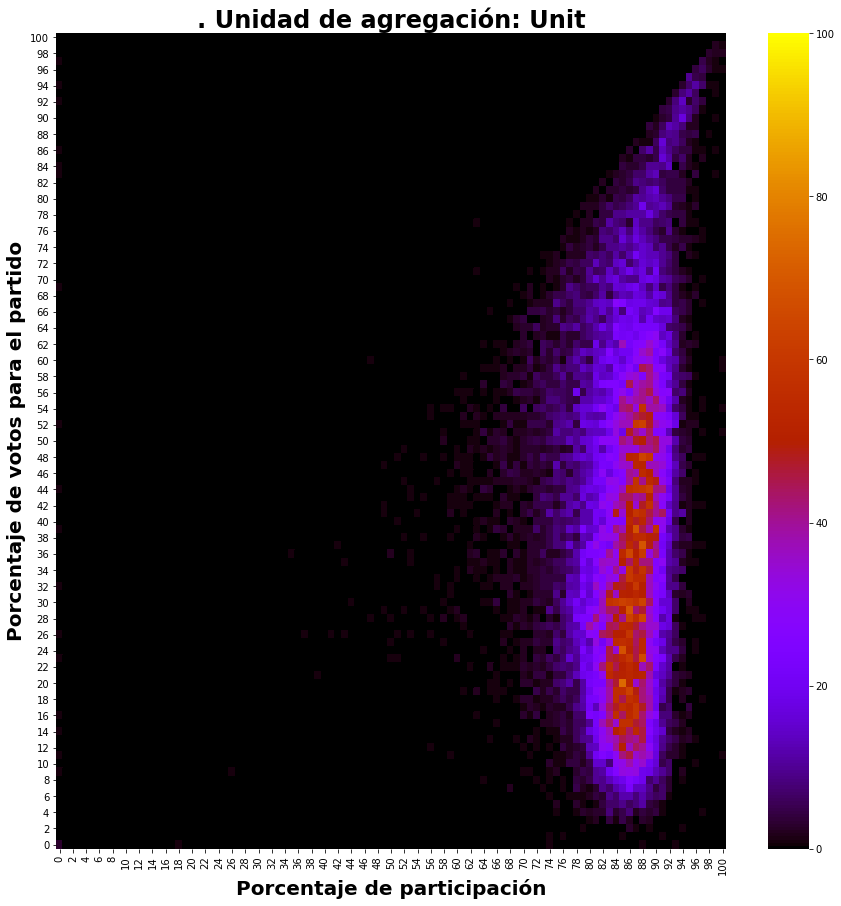

In [29]:
fgp_df, _, fgp_fig = plot_fingerprint(
    outlier_rem_data_df, "winner_percentage", "turnout_percentage", vmax=100, center=50
)

In [34]:
# Transform the data
outlier_rem_scaled_df = outlier_rem_data_df[
    (outlier_rem_data_df["winner_percentage"] < outlier_rem_data_df["INSCRITOS"])
    & (outlier_rem_data_df["winner_percentage"] > 0)
]
outlier_rem_scaled_df.head()

PAIS  NÚMERO_DEPARTAMENTO NOMBRE_DEPARTAMENTO NOMBRE_PROVINCIA  \
0  BOLIVIA                    1          CHUQUISACA          OROPEZA   
1  BOLIVIA                    1          CHUQUISACA          OROPEZA   
2  BOLIVIA                    1          CHUQUISACA          OROPEZA   
3  BOLIVIA                    1          CHUQUISACA          OROPEZA   
4  BOLIVIA                    1          CHUQUISACA          OROPEZA   

   NÚMERO_MUNICIPIO NOMBRE_MUNICIPIO  CIRCUNSCRIPCIÓN      LOCALIDAD  \
0                 1            SUCRE              NaN        ARABATE   
1                 1            SUCRE              NaN       CHAUNACA   
2                 1            SUCRE              NaN       CHAUNACA   
3                 1            SUCRE              NaN  CHUQUI CHUQUI   
4                 1            SUCRE              NaN  CHUQUI CHUQUI   

                          RECINTO  NUMERO_MESA  ...  MNR PAN-BOL  VALIDOS  \
0                 ESCUELA ARABATE        10001  ...    0       0       82   
1   ESCUELA SECCIONAL DE CHAUNACA        10002  ...    1       1      171   
2   ESCUELA SECCIONAL DE CHAUNACA        10003  ...    0       0       78   
3  UNIDAD EDUCATIVA CHUQUI CHUQUI        10004  ...    2       0      168   
4  UNIDAD EDUCATIVA CHUQUI CHUQUI        10005  ...    0       0      172   

   BLANCOS  NULOS  ESTADO_ACTA  YEAR  CODIGO_MUNICIPIO  turnout_percentage  \
0        6     11    COMPUTADA  2019             10101                  56   
1        6     12    COMPUTADA  2019             10101                  78   
2        5      0    COMPUTADA  2019             10101                  74   
3       11     13    COMPUTADA  2019             10101                  76   
4       13      5    COMPUTADA  2019             10101                  81   

   winner_percentage  
0                 54  
1                 62  
2                 68  
3                 53  
4                 55  

[5 rows x 30 columns]

In [24]:
outlier_rem_scaled_df.loc[:, "log_vote_rate"] = np.log(
    (
        outlier_rem_scaled_df.loc[:, "INSCRITOS"]
        - outlier_rem_scaled_df.loc[:, "winner_percentage"]
    )
    / outlier_rem_scaled_df.loc[:, "winner_percentage"]
)
outlier_rem_scaled_df.head()

/Users/adrianvillarroel/anaconda3/envs/bambootec/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/adrianvillarroel/anaconda3/envs/bambootec/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


PAIS  NÚMERO_DEPARTAMENTO NOMBRE_DEPARTAMENTO NOMBRE_PROVINCIA  \
0  BOLIVIA                    1          CHUQUISACA          OROPEZA   
1  BOLIVIA                    1          CHUQUISACA          OROPEZA   
2  BOLIVIA                    1          CHUQUISACA          OROPEZA   
3  BOLIVIA                    1          CHUQUISACA          OROPEZA   
4  BOLIVIA                    1          CHUQUISACA          OROPEZA   

   NÚMERO_MUNICIPIO NOMBRE_MUNICIPIO  CIRCUNSCRIPCIÓN      LOCALIDAD  \
0                 1            SUCRE              NaN        ARABATE   
1                 1            SUCRE              NaN       CHAUNACA   
2                 1            SUCRE              NaN       CHAUNACA   
3                 1            SUCRE              NaN  CHUQUI CHUQUI   
4                 1            SUCRE              NaN  CHUQUI CHUQUI   

                          RECINTO  NUMERO_MESA  ...  PAN-BOL VALIDOS  BLANCOS  \
0                 ESCUELA ARABATE        10001  ...        0      82        6   
1   ESCUELA SECCIONAL DE CHAUNACA        10002  ...        1     171        6   
2   ESCUELA SECCIONAL DE CHAUNACA        10003  ...        0      78        5   
3  UNIDAD EDUCATIVA CHUQUI CHUQUI        10004  ...        0     168       11   
4  UNIDAD EDUCATIVA CHUQUI CHUQUI        10005  ...        0     172       13   

   NULOS  ESTADO_ACTA  YEAR  CODIGO_MUNICIPIO  turnout_percentage  \
0     11    COMPUTADA  2019             10101                  56   
1     12    COMPUTADA  2019             10101                  78   
2      0    COMPUTADA  2019             10101                  74   
3     13    COMPUTADA  2019             10101                  76   
4      5    COMPUTADA  2019             10101                  81   

   winner_percentage  log_vote_rate  
0                 54       0.543615  
1                 62       0.929111  
2                 68      -0.608590  
3                 53       1.153672  
4                 55       1.055262  

[5 rows x 31 columns]

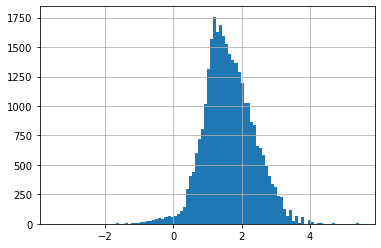

In [25]:
outlier_rem_scaled_df["log_vote_rate"].hist(bins=100)
plt.show()

# Plotting Bolivian elections 1985-2019 fingerprints at municipality level fingerprints

In [26]:
elec_mun_parties_df = pd.read_csv(
    "../Datasets/Bolivia/elecc_gen_mun_partidos_tendence_2019.csv"
)

In [27]:
elec_mun_parties_df[elec_mun_parties_df["VALIDOS"] != 0].head()

YEAR  CODIGO_MUNICIPIO NOMBRE_DEPARTAMENTO NOMBRE_PROVINCIA  \
4   1985             90104               PANDO   NICOLAS SUAREZ   
7   1985             80201                BENI        VACA DIEZ   
11  1985             90201               PANDO         MANURIPI   
12  1985             90101               PANDO   NICOLAS SUAREZ   
14  1985             90203               PANDO         MANURIPI   

   NOMBRE_MUNICIPIO PARTIDOS  VALIDOS REF_PARTIES IZQUIERDA/DERECHA  \
4        BELLA FLOR      ACP      2.0    1985_ACP         IZQUIERDA   
7         RIBERALTA      ACP      4.0    1985_ACP         IZQUIERDA   
11      PUERTO RICO      ACP      1.0    1985_ACP         IZQUIERDA   
12           COBIJA      ACP      1.0    1985_ACP         IZQUIERDA   
14       FILADELFIA      ACP      3.0    1985_ACP         IZQUIERDA   

    VALUE_TEND_PARTIDOS  COD_TENDENCE  
4                    -2             0  
7                    -2             0  
11                   -2             0  
12                   -2             0  
14                   -2             0

In [28]:
elec_mun_parties_df.describe()

YEAR  CODIGO_MUNICIPIO        VALIDOS  VALUE_TEND_PARTIDOS  \
count  28299.000000      28299.000000   28299.000000         28299.000000   
mean    1999.485918      43090.042758     982.368964             0.014806   
std       10.911234      23702.699281    9235.239451             2.989349   
min     1985.000000      10101.000000       0.000000            -4.000000   
25%     1989.000000      21201.000000      13.000000            -3.000000   
50%     1997.000000      40401.000000      49.000000            -1.000000   
75%     2009.000000      70104.000000     259.000000             3.000000   
max     2019.000000      90503.000000  506024.000000             4.000000   

       COD_TENDENCE  
count  28299.000000  
mean       0.414962  
std        0.492724  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [29]:
votes_year_party_df = (
    elec_mun_parties_df.groupby(["YEAR", "PARTIDOS"])["VALIDOS"].sum().reset_index()
)
votes_year_party_df.head()

YEAR PARTIDOS   VALIDOS
0  1985      ACP   13365.0
1  1985      ADN  494998.0
2  1985    ARENA    8773.0
3  1985      AUR    9695.0
4  1985      FNP   10086.0

In [30]:
votes_year_party_df[votes_year_party_df["PARTIDOS"] == "MNR_MRTKL"]

YEAR   PARTIDOS        VALIDOS
39  1993  MNR_MRTKL  580105.759022

In [31]:
idx = (
    votes_year_party_df.groupby(["YEAR"])["VALIDOS"].transform(max)
    == votes_year_party_df["VALIDOS"]
)
winners_per_year_df = votes_year_party_df[idx].loc[:, ["YEAR", "PARTIDOS"]]
winners_per_year_df.head(10)

YEAR   PARTIDOS
1   1985        ADN
25  1989        MNR
39  1993  MNR_MRTKL
42  1997        ADN
59  2002        MNR
64  2005        MAS
75  2009        MAS
79  2014        MAS
87  2019        MAS

In [32]:
mun_elec_df.columns

Index(['YEAR', 'CODIGO_MUNICIPIO', 'NOMBRE_DEPARTAMENTO', 'NOMBRE_PROVINCIA',
       'NOMBRE_MUNICIPIO', 'VALIDOS', 'BLANCOS', 'NULOS', 'INSCRITOS',
       'TOTAL'],
      dtype='object')

In [33]:
mun_elec_df.head()

YEAR  CODIGO_MUNICIPIO NOMBRE_DEPARTAMENTO NOMBRE_PROVINCIA  \
0  1985             90501               PANDO   FEDERICO ROMAN   
1  1985             90503               PANDO   FEDERICO ROMAN   
2  1985             90402               PANDO            ABUNA   
3  1985             90401               PANDO            ABUNA   
4  1985             90104               PANDO   NICOLAS SUAREZ   

  NOMBRE_MUNICIPIO  VALIDOS  BLANCOS  NULOS  INSCRITOS  TOTAL  
0  NUEVA ESPERANZA       18        0      0         22     18  
1   SANTOS MERCADO      123       19      4        169    146  
2           INGAVI      774       22     95        981    891  
3       SANTA ROSA      187        1      1        203    189  
4       BELLA FLOR      853       27     11        968    891

In [34]:
# 1993 doesn't have "INSCRITOS"
mun_elec_df.loc[mun_elec_df["YEAR"] == 1993, "INSCRITOS"] = mun_elec_df.loc[
    mun_elec_df["YEAR"] == 1993, "TOTAL"
]
mun_elec_df["turnout_percentage"] = (
    mun_elec_df["VALIDOS"] * 100 / mun_elec_df["INSCRITOS"]
).round()

In [35]:
# Get the percentage of winners per year
groups = elec_mun_parties_df.groupby("YEAR")
group_dfs = list(zip(*groups))[1]
groups_year_df_list = list(
    zip(*[(group_df["YEAR"].max(), group_df) for group_df in group_dfs])
)
year_groups_dict = dict(zip(groups_year_df_list[0], groups_year_df_list[1]))
# Get the year winner
year_winner_dict = pd.Series(
    data=winners_per_year_df["PARTIDOS"].values, index=winners_per_year_df["YEAR"]
).to_dict()
year_winner_groups_dict = {}
for k, v in year_winner_dict.items():
    winner_df = year_groups_dict[k]
    winner_df = winner_df[winner_df["PARTIDOS"] == v]
    year_winner_groups_dict[(k, v)] = winner_df
all_years_winners_df = pd.concat(year_winner_groups_dict.values()).rename(
    {"VALIDOS": "WINNER_VOTES"}, axis=1
)
all_years_winners_df.head()

YEAR  CODIGO_MUNICIPIO NOMBRE_DEPARTAMENTO NOMBRE_PROVINCIA  \
267  1985             90501               PANDO   FEDERICO ROMAN   
268  1985             90503               PANDO   FEDERICO ROMAN   
269  1985             90402               PANDO            ABUNA   
270  1985             90401               PANDO            ABUNA   
271  1985             90104               PANDO   NICOLAS SUAREZ   

    NOMBRE_MUNICIPIO PARTIDOS  WINNER_VOTES REF_PARTIES IZQUIERDA/DERECHA  \
267  NUEVA ESPERANZA      ADN           3.0    1985_ADN           DERECHA   
268   SANTOS MERCADO      ADN          23.0    1985_ADN           DERECHA   
269           INGAVI      ADN         374.0    1985_ADN           DERECHA   
270       SANTA ROSA      ADN          16.0    1985_ADN           DERECHA   
271       BELLA FLOR      ADN         284.0    1985_ADN           DERECHA   

     VALUE_TEND_PARTIDOS  COD_TENDENCE  
267                    4             1  
268                    4             1  
269                    4             1  
270                    4             1  
271                    4             1

In [36]:
# Merge winner votes with suscribed people
all_years_mun_votes_df = pd.merge(
    mun_elec_df,
    all_years_winners_df.loc[
        :, ["YEAR", "CODIGO_MUNICIPIO", "PARTIDOS", "WINNER_VOTES"]
    ],
    on=["YEAR", "CODIGO_MUNICIPIO"],
    how="inner",
)
all_years_mun_votes_df.loc[:, "winner_percentage"] = (
    all_years_mun_votes_df["WINNER_VOTES"] * 100 / all_years_mun_votes_df["INSCRITOS"]
).round()
all_years_mun_votes_df.head()

YEAR  CODIGO_MUNICIPIO NOMBRE_DEPARTAMENTO NOMBRE_PROVINCIA  \
0  1985             90501               PANDO   FEDERICO ROMAN   
1  1985             90503               PANDO   FEDERICO ROMAN   
2  1985             90402               PANDO            ABUNA   
3  1985             90401               PANDO            ABUNA   
4  1985             90104               PANDO   NICOLAS SUAREZ   

  NOMBRE_MUNICIPIO  VALIDOS  BLANCOS  NULOS  INSCRITOS  TOTAL  \
0  NUEVA ESPERANZA       18        0      0         22     18   
1   SANTOS MERCADO      123       19      4        169    146   
2           INGAVI      774       22     95        981    891   
3       SANTA ROSA      187        1      1        203    189   
4       BELLA FLOR      853       27     11        968    891   

   turnout_percentage PARTIDOS  WINNER_VOTES  winner_percentage  
0                82.0      ADN           3.0               14.0  
1                73.0      ADN          23.0               14.0  
2                79.0      ADN         374.0               38.0  
3                92.0      ADN          16.0                8.0  
4                88.0      ADN         284.0               29.0

In [37]:
all_years_mun_votes_df[all_years_mun_votes_df["YEAR"] == 1993]

YEAR  CODIGO_MUNICIPIO NOMBRE_DEPARTAMENTO NOMBRE_PROVINCIA  \
544  1993             90501               PANDO   FEDERICO ROMAN   
545  1993             90503               PANDO   FEDERICO ROMAN   
546  1993             90402               PANDO            ABUNA   
547  1993             90401               PANDO            ABUNA   
548  1993             90104               PANDO   NICOLAS SUAREZ   
..    ...               ...                 ...              ...   
836  1993             60201              TARIJA             ARCE   
837  1993             60202              TARIJA             ARCE   
838  1993             71101          SANTA CRUZ  NUFLO DE CHAVEZ   
839  1993             71102          SANTA CRUZ  NUFLO DE CHAVEZ   
840  1993             71104          SANTA CRUZ  NUFLO DE CHAVEZ   

    NOMBRE_MUNICIPIO  VALIDOS  BLANCOS  NULOS  INSCRITOS  TOTAL  \
544  NUEVA ESPERANZA       32        0      1         33     33   
545   SANTOS MERCADO      138        3      5        146    146   
546           INGAVI      208        2     23        233    233   
547       SANTA ROSA      218        2      7        227    227   
548       BELLA FLOR      464        7      3        474    474   
..               ...      ...      ...    ...        ...    ...   
836          PADCAYA     3131       80     53       3264   3264   
837          BERMEJO     9915      199    143      10257  10257   
838       CONCEPCION     1298       24      9       1331   1331   
839       SAN JAVIER     7538      325    232       8095   8095   
840       SAN JULIAN      266        6      6        278    278   

     turnout_percentage   PARTIDOS  WINNER_VOTES  winner_percentage  
544                97.0  MNR_MRTKL      6.000000               18.0  
545                95.0  MNR_MRTKL     31.000044               21.0  
546                89.0  MNR_MRTKL     47.999952               21.0  
547                96.0  MNR_MRTKL     70.000018               31.0  
548                98.0  MNR_MRTKL     79.000176               17.0  
..                  ...        ...           ...                ...  
836                96.0  MNR_MRTKL   1111.999698               34.0  
837                97.0  MNR_MRTKL   5546.004825               54.0  
838                98.0  MNR_MRTKL    387.999458               29.0  
839                93.0  MNR_MRTKL   2073.997782               26.0  
840                96.0  MNR_MRTKL     57.999970               21.0  

[297 rows x 14 columns]

In [38]:
def get_row_col_from_layout(nrows, ncols, index, row_wise=True):
    if row_wise:
        row = int(np.floor(index / ncols))
        col = int(index % ncols)
    else:
        row = int(index % nrows)
        col = int(np.floor(idex / nrows))
    return row, col

In [39]:
all_years_mun_votes_df = all_years_mun_votes_df.replace([np.inf, -np.inf], np.nan)
all_years_mun_votes_df.loc[
    :, all_years_mun_votes_df.dtypes == "float"
] = all_years_mun_votes_df.loc[:, all_years_mun_votes_df.dtypes == "float"].fillna(0)
all_years_mun_votes_df.loc[
    :, all_years_mun_votes_df.dtypes == "int"
] = all_years_mun_votes_df.loc[:, all_years_mun_votes_df.dtypes == "int"].fillna(0)

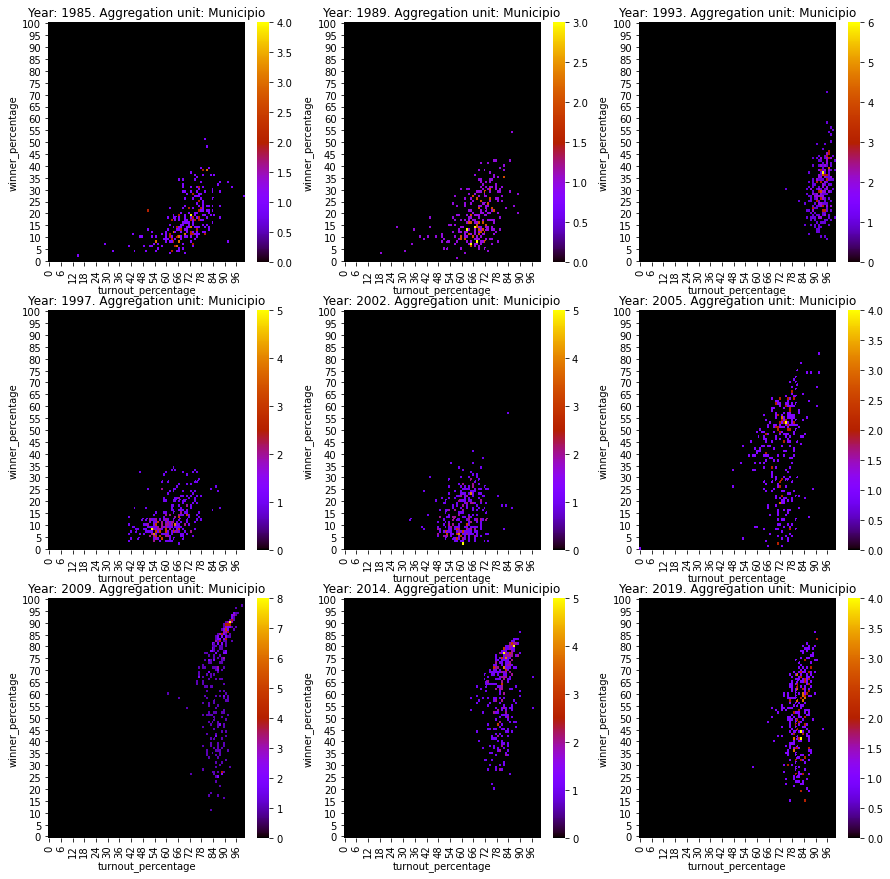

In [40]:
# Create figure
year_groups = all_years_mun_votes_df.groupby("YEAR")
fig = plt.figure(figsize=(15, 15))
nrows = 3
ncols = 3
gs = fig.add_gridspec(nrows, ncols)
for (index, (year, group)) in enumerate(year_groups):
    row, col = get_row_col_from_layout(nrows, ncols, index)
    ax = fig.add_subplot(gs[row, col])
    fgp_df, _, _ = plot_fingerprint(
        group, "winner_percentage", "turnout_percentage", show=False
    )
    sns.heatmap(fgp_df, ax=ax, cmap="gnuplot")
    plt.title("Year: " + str(year) + "." " Aggregation unit: Municipio")
plt.show()

In [41]:
list(year_groups)

[(1985,
       YEAR  CODIGO_MUNICIPIO NOMBRE_DEPARTAMENTO NOMBRE_PROVINCIA  \
  0    1985             90501               PANDO   FEDERICO ROMAN   
  1    1985             90503               PANDO   FEDERICO ROMAN   
  2    1985             90402               PANDO            ABUNA   
  3    1985             90401               PANDO            ABUNA   
  4    1985             90104               PANDO   NICOLAS SUAREZ   
  ..    ...               ...                 ...              ...   
  262  1985             60201              TARIJA             ARCE   
  263  1985             60202              TARIJA             ARCE   
  264  1985             71501          SANTA CRUZ         GUARAYOS   
  265  1985             71101          SANTA CRUZ  NUFLO DE CHAVEZ   
  266  1985             71102          SANTA CRUZ  NUFLO DE CHAVEZ   
  
            NOMBRE_MUNICIPIO  VALIDOS  BLANCOS  NULOS  INSCRITOS  TOTAL  \
  0          NUEVA ESPERANZA       18        0      0         22     18   

In [42]:
len(year_groups)

9

1985
1989
1993
1997
2002
2005
2009
2014
2019


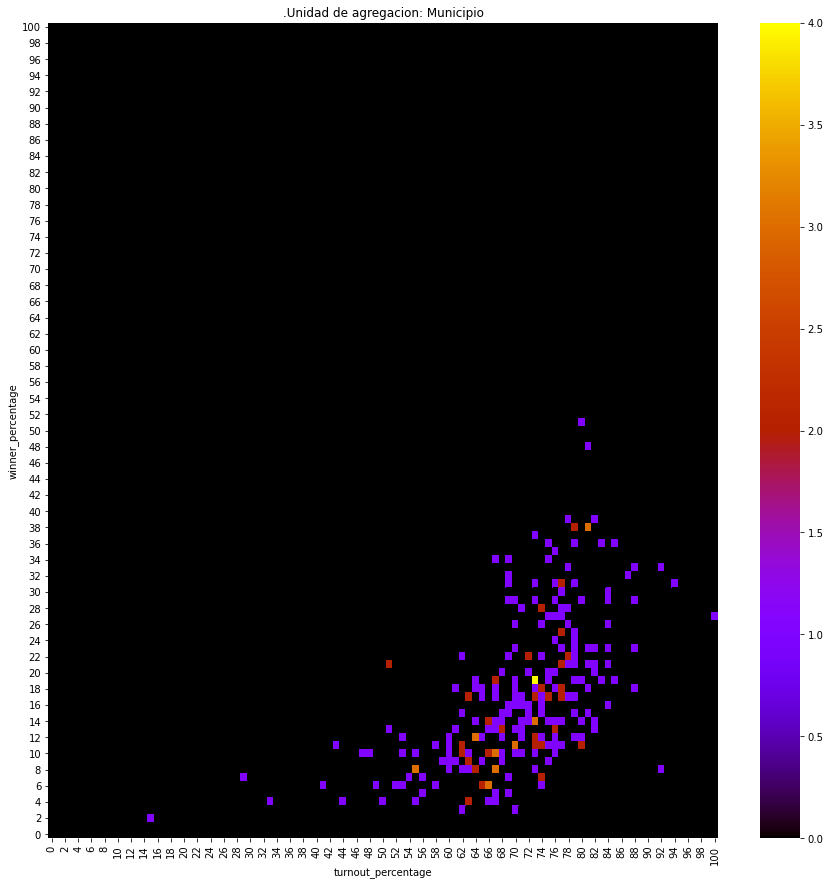

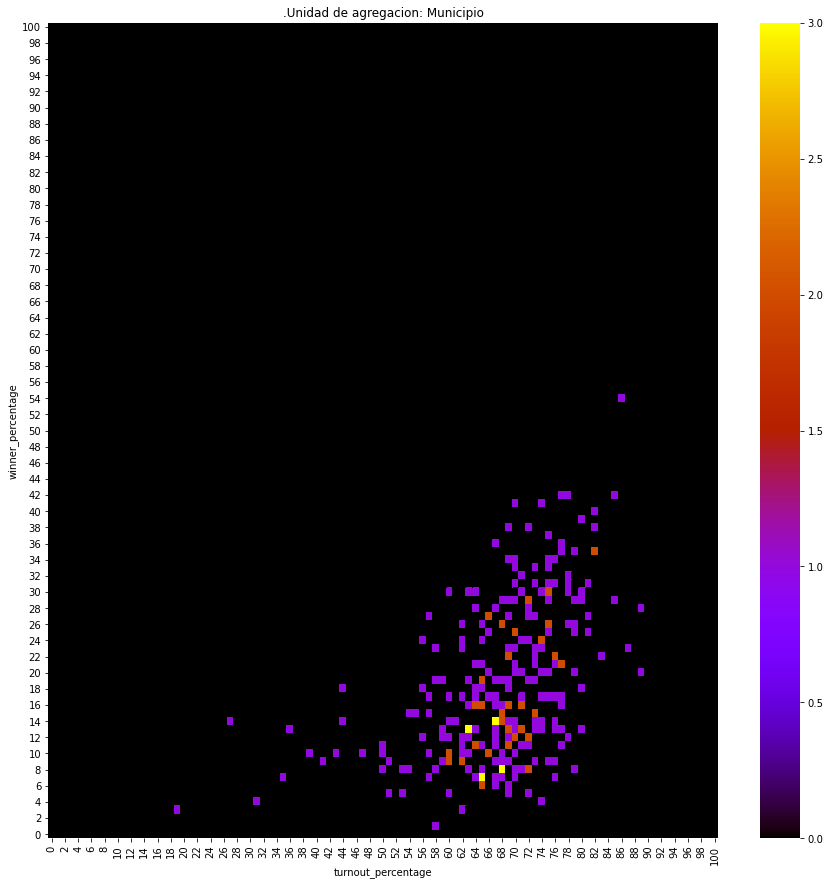

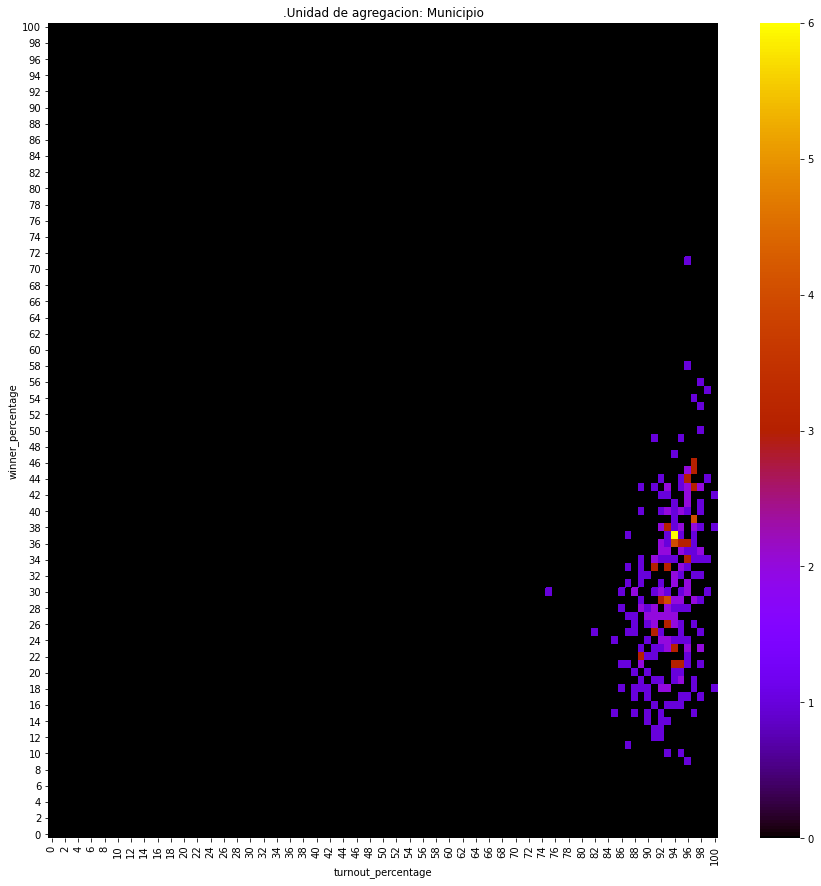

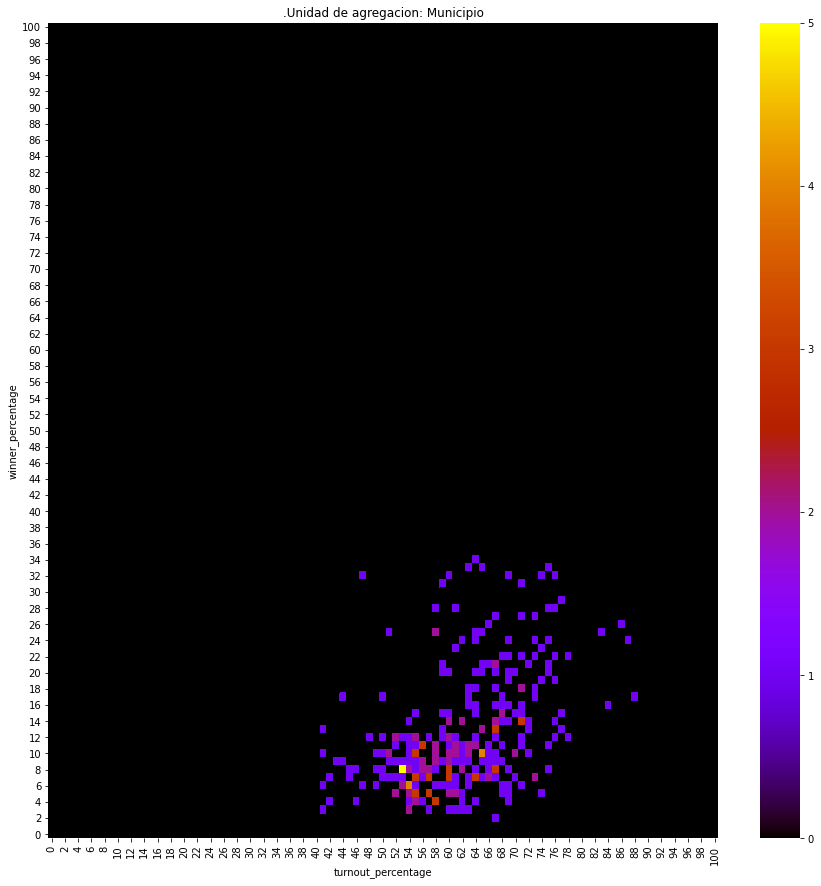

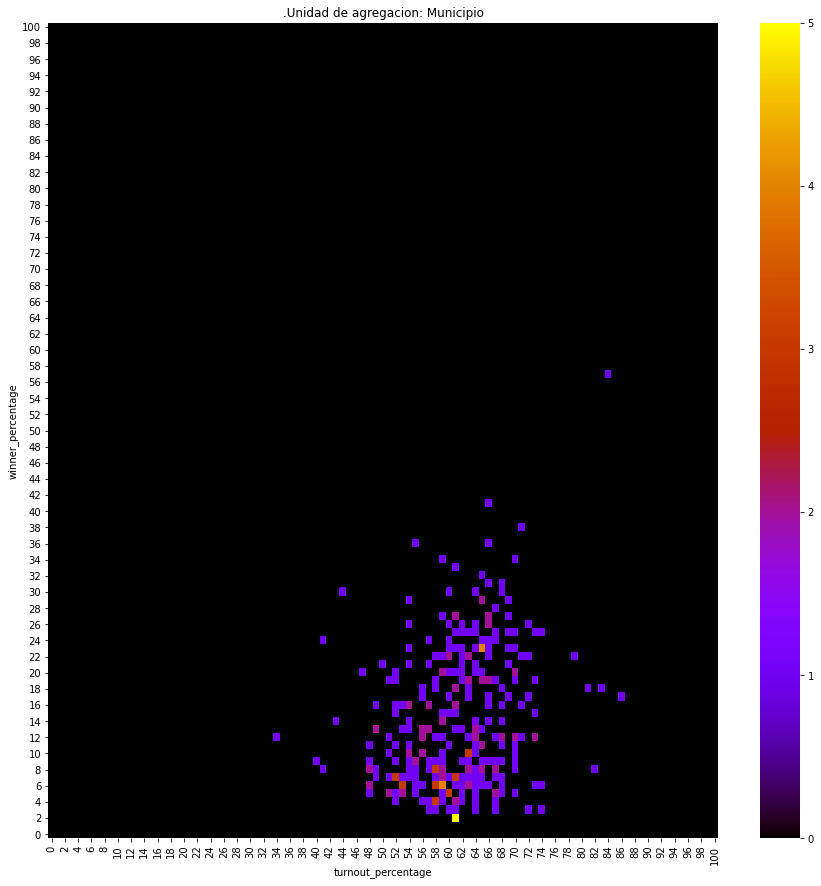

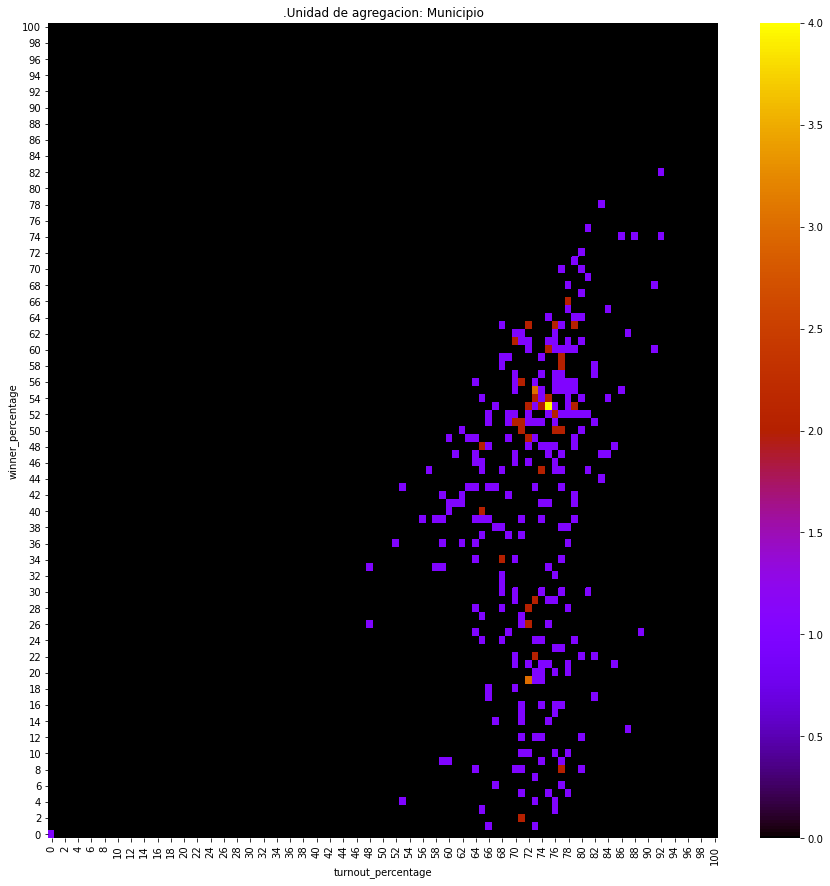

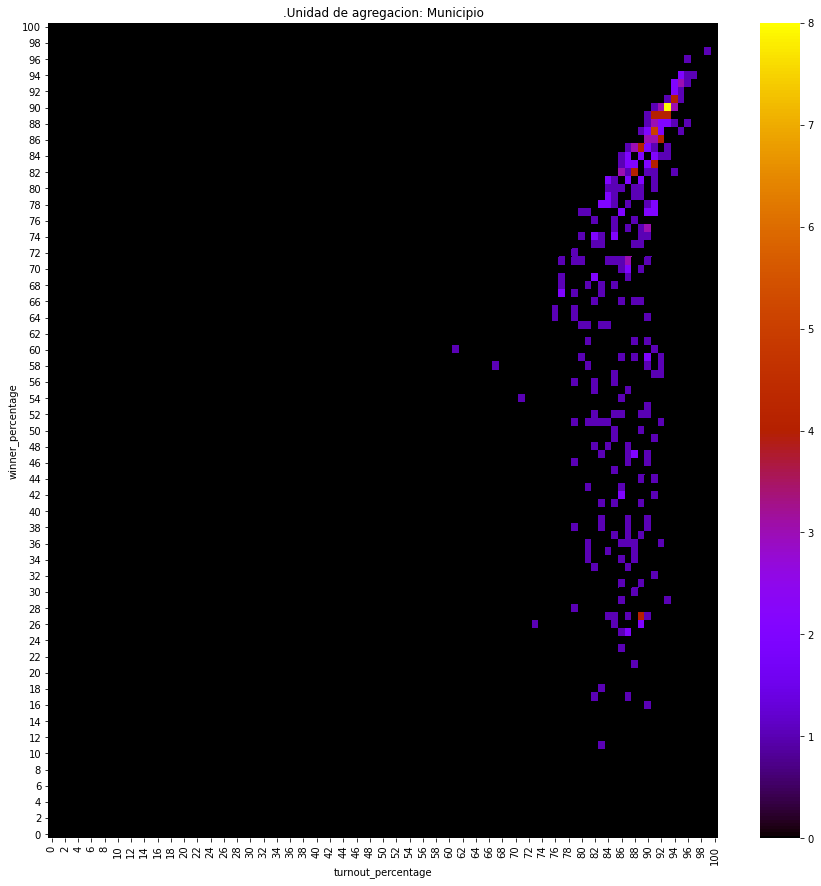

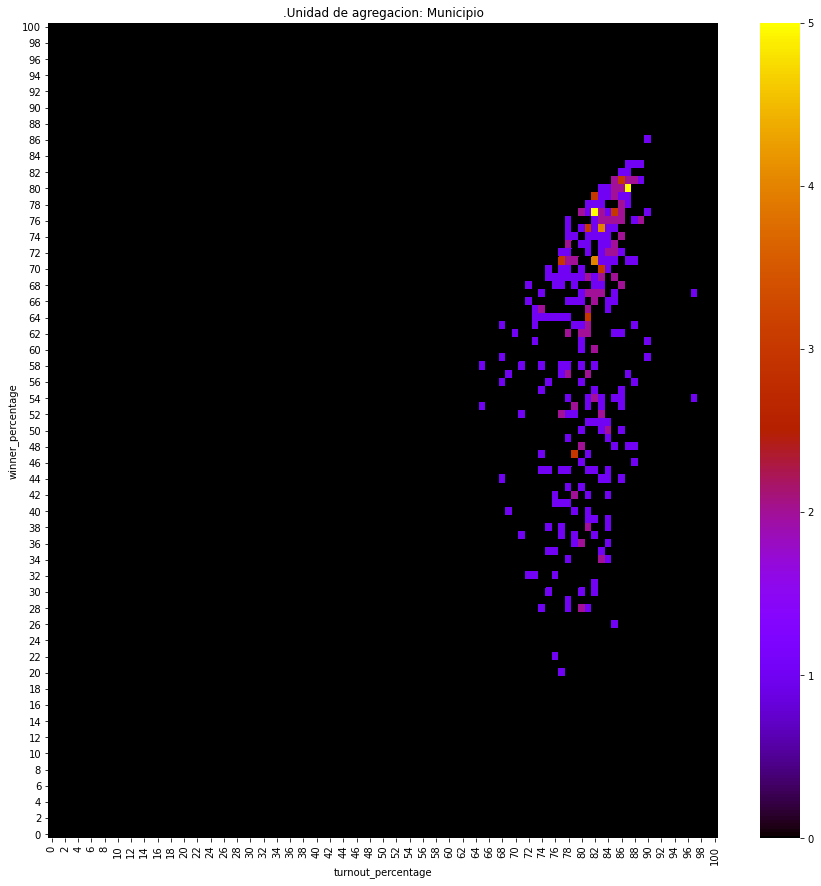

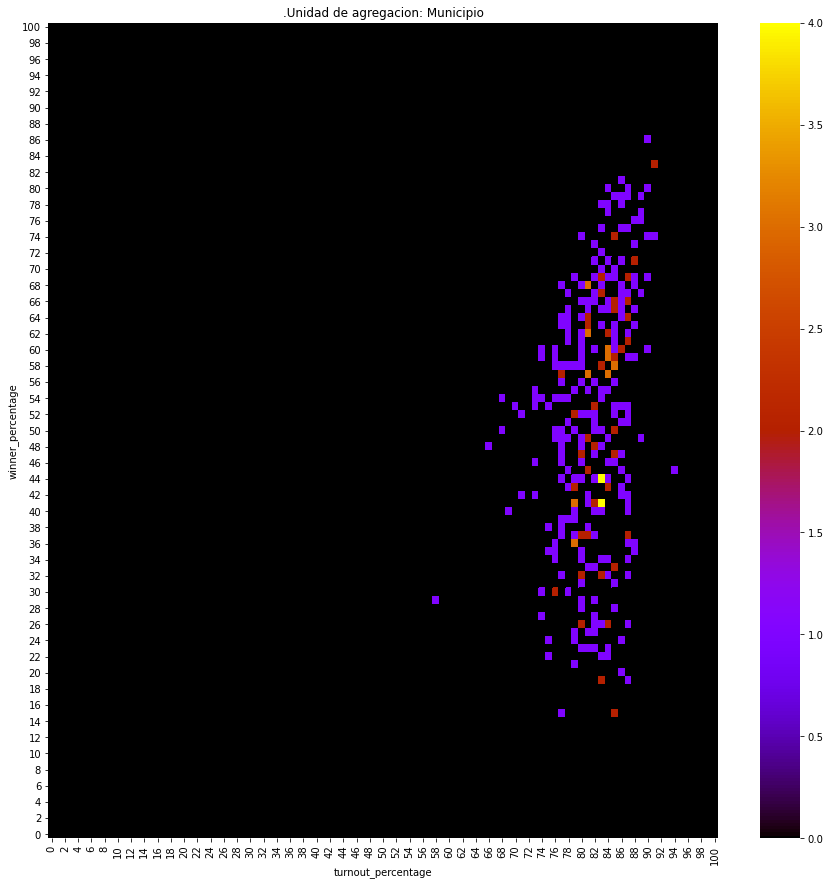

In [43]:
for (_, group) in year_groups:
    print(group["YEAR"].max())
    plot_fingerprint(group, "winner_percentage", "turnout_percentage", unit="Municipio")

In [44]:
data_mun_df = (
    data_df.groupby(["CODIGO_MUNICIPIO", "NOMBRE_MUNICIPIO"])
    .agg({"MAS": "sum", "VALIDOS": "sum", "INSCRITOS": "sum"})
    .reset_index()
    .rename({"MAS": "winner_votes"}, axis=1)
)
data_mun_df.loc[:, "turnout_percentage"] = (
    data_mun_df.loc[:, "VALIDOS"] * 100 / data_mun_df.loc[:, "INSCRITOS"]
).round()
data_mun_df.loc[:, "winner_percentage"] = (
    data_mun_df.loc[:, "winner_votes"] * 100 / data_mun_df.loc[:, "INSCRITOS"]
).round()

(turnout_percentage  0    1    2    3    4    5    6    7    8    9    ...  \
 winner_percentage                                                     ...   
 100                 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
 99                  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
 98                  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
 97                  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
 96                  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
 ...                 ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
 4                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
 3                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
 2                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
 1                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
 0                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

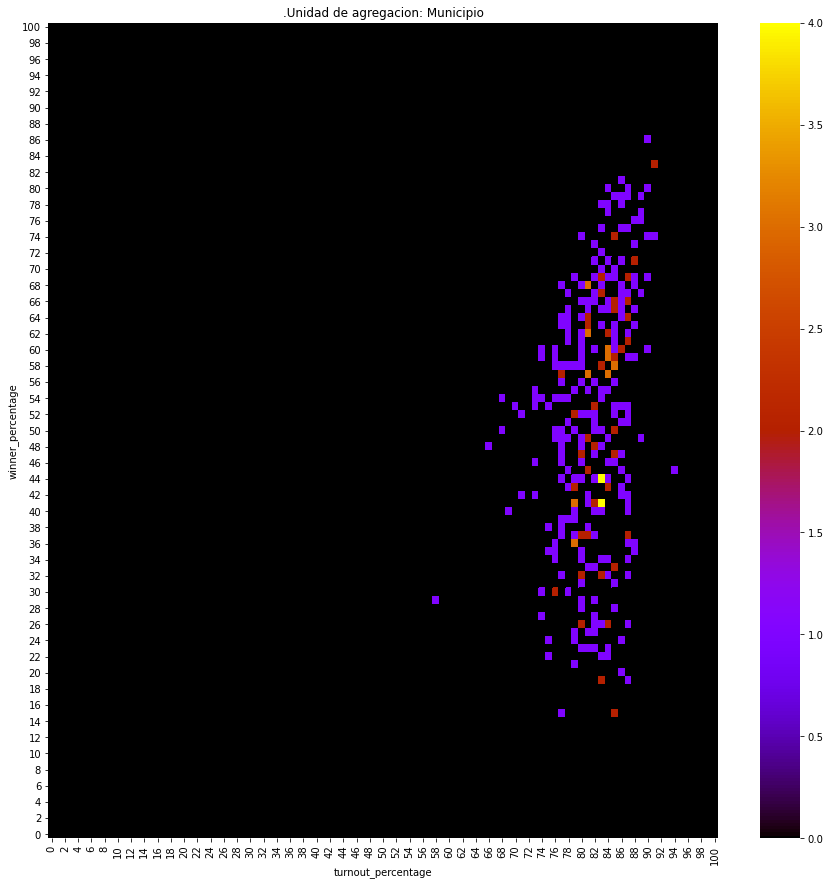

In [45]:
plot_fingerprint(
    data_mun_df,
    "winner_percentage",
    "turnout_percentage",
    unit="Municipio",
    figsize=(15, 15),
)

In [91]:
VALUE_COLS = ["CC", "FPV", "MTS", "UCS", "MAS", "21F", "PDC", "MNR", "PAN-BOL"]
ID_COLS = list(set(outlier_rem_data_df.columns).difference(set(VALUE_COLS)))
melted_outlier_rem_data_df = outlier_rem_data_df.melt(
    ID_COLS, VALUE_COLS, var_name="PARTIDO", value_name="VOTOS_QTY"
)
melted_outlier_rem_data_df

NÚMERO_MUNICIPIO  VALIDOS     PAIS  CIRCUNSCRIPCIÓN  \
0                      1       82  BOLIVIA              NaN   
1                      1      171  BOLIVIA              NaN   
2                      1       78  BOLIVIA              NaN   
3                      1      168  BOLIVIA              NaN   
4                      1      172  BOLIVIA              NaN   
...                  ...      ...      ...              ...   
280138                 3      181  BOLIVIA              NaN   
280139                 3      182  BOLIVIA              NaN   
280140                 3      170  BOLIVIA              NaN   
280141                 3       73  BOLIVIA              NaN   
280142                 3      153  BOLIVIA              NaN   

        turnout_percentage                 LOCALIDAD         CÓDIGO_MESA  \
0                       56                   ARABATE  100320112040005201   
1                       78                  CHAUNACA  100320112050005301   
2                       74                  CHAUNACA  100320112050005302   
3                       76             CHUQUI CHUQUI  100320112060005401   
4                       81             CHUQUI CHUQUI  100320112060005402   
...                    ...                       ...                 ...   
280138                  79                   RESERVA  100320930650000102   
280139                  78  SAN MARTIN DEL PACAHUARA  100320935320000101   
280140                  73  SAN MARTIN DEL PACAHUARA  100320935320000102   
280141                  73  SAN MARTIN DEL PACAHUARA  100320935320000103   
280142                  76            VILLA VICTORIA  100320938880000101   

       NOMBRE_PROVINCIA  CODIGO_MUNICIPIO  YEAR  ...  \
0               OROPEZA             10101  2019  ...   
1               OROPEZA             10101  2019  ...   
2               OROPEZA             10101  2019  ...   
3               OROPEZA             10101  2019  ...   
4               OROPEZA             10101  2019  ...   
...                 ...               ...   ...  ...   
280138   FEDERICO ROMAN             90503  2019  ...   
280139   FEDERICO ROMAN             90503  2019  ...   
280140   FEDERICO ROMAN             90503  2019  ...   
280141   FEDERICO ROMAN             90503  2019  ...   
280142   FEDERICO ROMAN             90503  2019  ...   

                           ELECCIÓN NÚMERO_DEPARTAMENTO  \
0       PRESIDENTE Y VICEPRESIDENTE                   1   
1       PRESIDENTE Y VICEPRESIDENTE                   1   
2       PRESIDENTE Y VICEPRESIDENTE                   1   
3       PRESIDENTE Y VICEPRESIDENTE                   1   
4       PRESIDENTE Y VICEPRESIDENTE                   1   
...                             ...                 ...   
280138  PRESIDENTE Y VICEPRESIDENTE                   9   
280139  PRESIDENTE Y VICEPRESIDENTE                   9   
280140  PRESIDENTE Y VICEPRESIDENTE                   9   
280141  PRESIDENTE Y VICEPRESIDENTE                   9   
280142  PRESIDENTE Y VICEPRESIDENTE                   9   

                               RECINTO NOMBRE_MUNICIPIO  NOMBRE_DEPARTAMENTO  \
0                      ESCUELA ARABATE            SUCRE           CHUQUISACA   
1        ESCUELA SECCIONAL DE CHAUNACA            SUCRE           CHUQUISACA   
2        ESCUELA SECCIONAL DE CHAUNACA            SUCRE           CHUQUISACA   
3       UNIDAD EDUCATIVA CHUQUI CHUQUI            SUCRE           CHUQUISACA   
4       UNIDAD EDUCATIVA CHUQUI CHUQUI            SUCRE           CHUQUISACA   
...                                ...              ...                  ...   
280138                   19 DE OCTUBRE   SANTOS MERCADO                PANDO   
280139               U.E.  23 DE MARZO   SANTOS MERCADO                PANDO   
280140               U.E.  23 DE MARZO   SANTOS MERCADO                PANDO   
280141               U.E.  23 DE MARZO   SANTOS MERCADO                PANDO   
280142           U.E. 11 DE SEPTIEMBRE   SANTOS MERCADO                PANDO

In [58]:
ID_COLS

['NÚMERO_MUNICIPIO',
 'VALIDOS',
 'PAIS',
 'CIRCUNSCRIPCIÓN',
 'turnout_percentage',
 'LOCALIDAD',
 'CÓDIGO_MESA',
 'NOMBRE_PROVINCIA',
 'CODIGO_MUNICIPIO',
 'YEAR',
 'BLANCOS',
 'ESTADO_ACTA',
 'NUMERO_MESA',
 'ELECCIÓN',
 'NÚMERO_DEPARTAMENTO',
 'RECINTO',
 'NOMBRE_MUNICIPIO',
 'NOMBRE_DEPARTAMENTO',
 'NULOS',
 'INSCRITOS',
 'winner_percentage']

In [90]:
melt_outlier_rem_data_df.drop_duplicates(subset="NUMERO_MESA")["INSCRITOS"].sum()

6861062

In [89]:
outlier_rem_data_df["INSCRITOS"].sum()

6861062

In [65]:
melted_outlier_rem_data_df.columns

Index(['NÚMERO_MUNICIPIO', 'VALIDOS', 'PAIS', 'CIRCUNSCRIPCIÓN',
       'turnout_percentage', 'LOCALIDAD', 'CÓDIGO_MESA', 'NOMBRE_PROVINCIA',
       'CODIGO_MUNICIPIO', 'YEAR', 'BLANCOS', 'ESTADO_ACTA', 'NUMERO_MESA',
       'ELECCIÓN', 'NÚMERO_DEPARTAMENTO', 'RECINTO', 'NOMBRE_MUNICIPIO',
       'NOMBRE_DEPARTAMENTO', 'NULOS', 'INSCRITOS', 'winner_percentage',
       'PARTIDO', 'VOTOS_QTY'],
      dtype='object')

In [95]:
alt_turnout_percentage_grouped_df = gen_s_curve_df(
    melted_outlier_rem_data_df, "NUMERO_MESA", "PARTIDO", "VOTOS_QTY", "INSCRITOS"
)
alt_turnout_percentage_grouped_df = alt_turnout_percentage_grouped_df[
    alt_turnout_percentage_grouped_df["PARTIDO"] == "MAS"
]

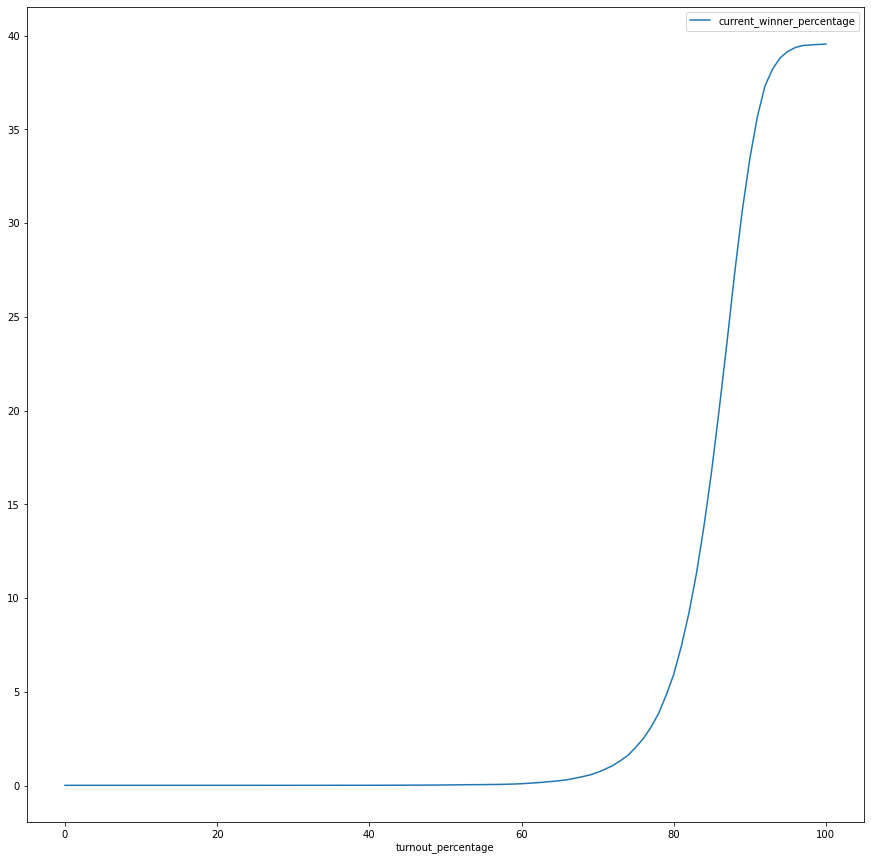

In [46]:
elections_2019_winner_votes_df = (
    outlier_rem_data_df[["MAS", "VALIDOS", "turnout_percentage", "INSCRITOS"]]
    .rename({"MAS": "winner_votes"}, axis=1)
    .sort_values(by="turnout_percentage")
)
total_suscribed = elections_2019_winner_votes_df["INSCRITOS"].sum()
turnout_percentage_grouped_df = elections_2019_winner_votes_df.groupby(
    "turnout_percentage", as_index=False
).agg({"winner_votes": sum})
turnout_percentage_grouped_df.loc[
    :, "winner_votes_cumulative"
] = turnout_percentage_grouped_df.loc[:, "winner_votes"].cumsum()
turnout_percentage_grouped_df.loc[:, "current_winner_percentage"] = (
    turnout_percentage_grouped_df.loc[:, "winner_votes_cumulative"]
    * 100
    / total_suscribed
)
fig = plt.figure(figsize=(15, 15))
ax = plt.gca()
turnout_percentage_grouped_df.plot(
    x="turnout_percentage", y="current_winner_percentage", ax=ax
)

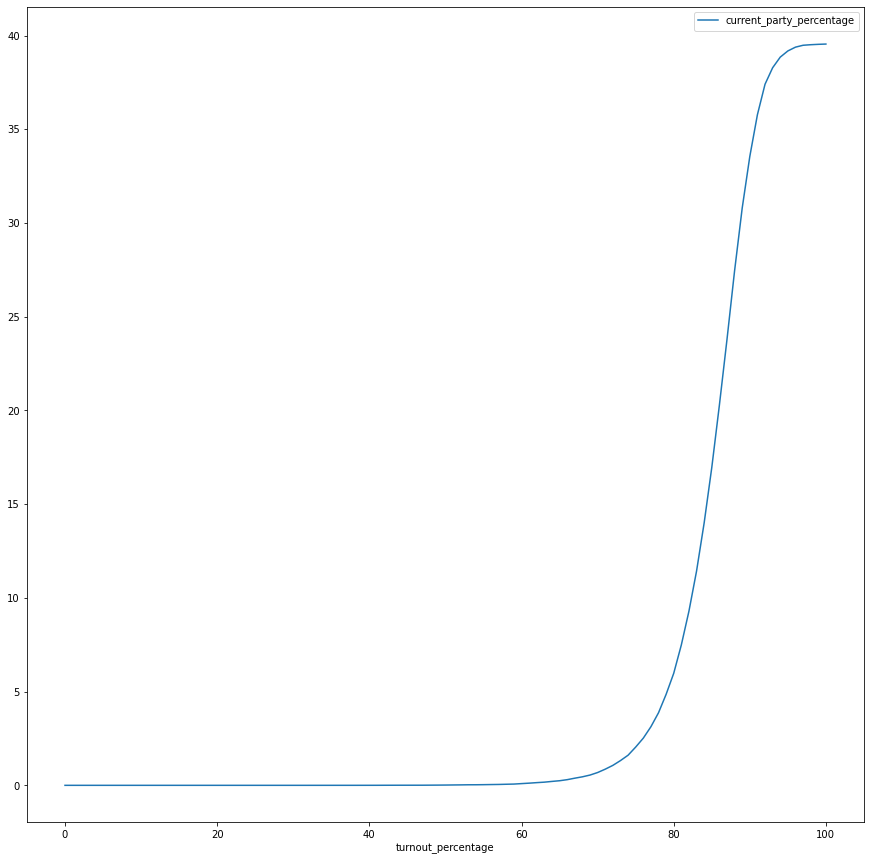

In [108]:
fig = plt.figure(figsize=(15, 15))
ax = plt.gca()
alt_turnout_percentage_grouped_df.plot(
    x="turnout_percentage", y="current_party_percentage", ax=ax
)

5841268


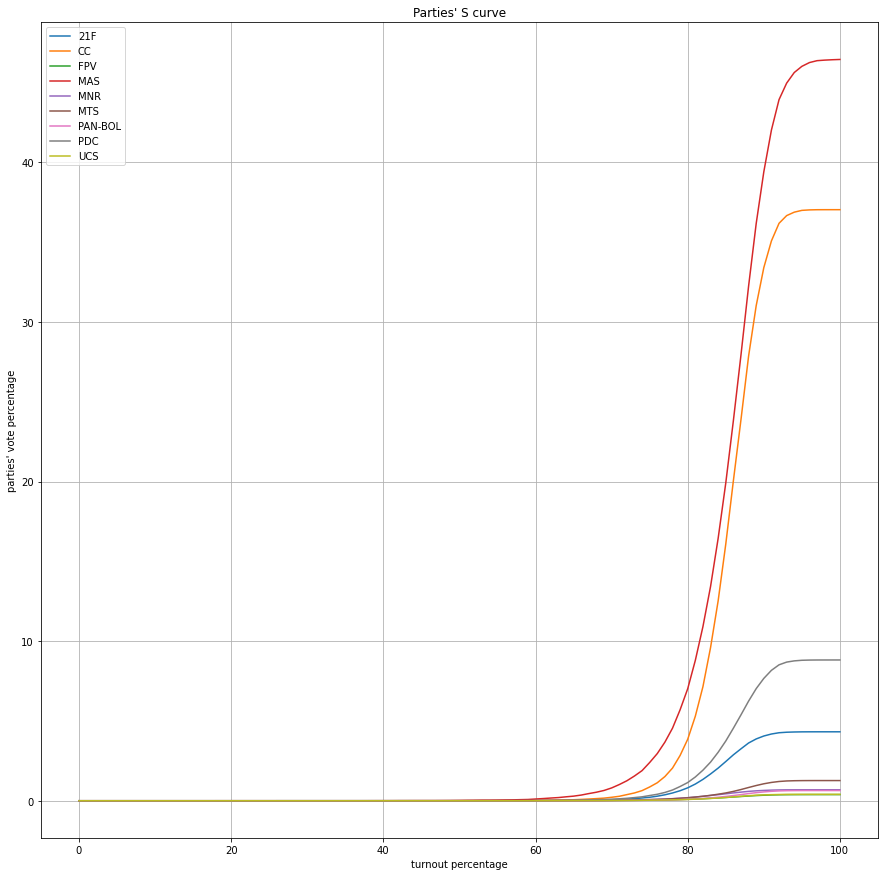

In [117]:
s_curve_fig,s_curve_df = plot_s_curves(
    melted_outlier_rem_data_df,
    "NUMERO_MESA",
    "PARTIDO",
    "VOTOS_QTY",
    "INSCRITOS",
    official_percentage=True,
)

In [79]:
alt_turnout_percentage_grouped_df

turnout_percentage PARTIDO  VOTOS_QTY  vote_qty_cumulative_colname  \
3                   0.0     MAS          1                            1   
12                  1.0     MAS          9                           10   
21                  2.0     MAS         30                           40   
30                  3.0     MAS        128                          168   
39                  4.0     MAS        451                          619   
..                  ...     ...        ...                          ...   
340                95.0     MAS       3963                      2706754   
341                96.0     MAS       2979                      2709733   
342                97.0     MAS       1529                      2711262   
343                98.0     MAS       1333                      2712595   
344                99.0     MAS        596                      2713191   

     current_party_percentage  
3                    0.000002  
12                   0.000016  
21                   0.000065  
30                   0.000272  
39                   0.001002  
..                        ...  
340                  4.383439  
341                  4.388263  
342                  4.390739  
343                  4.392898  
344                  4.393863  

[100 rows x 5 columns]

In [47]:
turnout_percentage_grouped_df

turnout_percentage  winner_votes  winner_votes_cumulative  \
0                    0          1667                     1667   
1                   18             1                     1668   
2                   26            10                     1678   
3                   35            85                     1763   
4                   37            32                     1795   
..                 ...           ...                      ...   
58                  96         14402                  2700768   
59                  97          7185                  2707953   
60                  98          2003                  2709956   
61                  99          1824                  2711780   
62                 100          1411                  2713191   

    current_winner_percentage  
0                    0.024297  
1                    0.024311  
2                    0.024457  
3                    0.025696  
4                    0.026162  
..                        ...  
58                  39.363702  
59                  39.468423  
60                  39.497617  
61                  39.524202  
62                  39.544767  

[63 rows x 4 columns]

In [49]:
dict(list(data_df.groupby("NOMBRE_MUNICIPIO")))

{'ACASIO':           PAIS  NÚMERO_DEPARTAMENTO NOMBRE_DEPARTAMENTO  \
 19386  BOLIVIA                    5              POTOSI   
 19387  BOLIVIA                    5              POTOSI   
 19388  BOLIVIA                    5              POTOSI   
 19389  BOLIVIA                    5              POTOSI   
 19390  BOLIVIA                    5              POTOSI   
 19391  BOLIVIA                    5              POTOSI   
 19392  BOLIVIA                    5              POTOSI   
 19393  BOLIVIA                    5              POTOSI   
 19394  BOLIVIA                    5              POTOSI   
 19395  BOLIVIA                    5              POTOSI   
 19396  BOLIVIA                    5              POTOSI   
 19397  BOLIVIA                    5              POTOSI   
 19398  BOLIVIA                    5              POTOSI   
 
                 NOMBRE_PROVINCIA  NÚMERO_MUNICIPIO NOMBRE_MUNICIPIO  \
 19386  GENERAL BERNARDINO BILBAO                 2           ACASIO   
 193